In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.9.1'

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [23]:
#!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
#!unzip dino-dragon.zip

In [24]:
train_dir = './train'
test_dir = './test'

# Model creation

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [27]:
# Answer for Question №1: binary crossentropy

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [29]:
# Answer for Question №2: 11,215,873

# Generators and Training

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [32]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 394 images belonging to 2 classes.


In [33]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 9s 109ms/step - loss: 0.6071 - acc: 0.6719 - val_loss: 0.4627 - val_acc: 0.8299
Epoch 2/10
80/80 [==============================] - 9s 108ms/step - loss: 0.4479 - acc: 0.8087 - val_loss: 0.4687 - val_acc: 0.7665
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3939 - acc: 0.8369 - val_loss: 0.3902 - val_acc: 0.8122
Epoch 4/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3300 - acc: 0.8701 - val_loss: 0.3325 - val_acc: 0.8655
Epoch 5/10
80/80 [==============================] - 9s 108ms/step - loss: 0.2815 - acc: 0.8883 - val_loss: 0.3163 - val_acc: 0.8629
Epoch 6/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2538 - acc: 0.9021 - val_loss: 0.3012 - val_acc: 0.8706
Epoch 7/10
80/80 [==============================] - 9s 108ms/step - loss: 0.2153 - acc: 0.9260 - val_loss: 0.3035 - val_acc: 0.8782
Epoch 8/10
80/80 [==============================] - 9s 106ms/step - loss: 0.

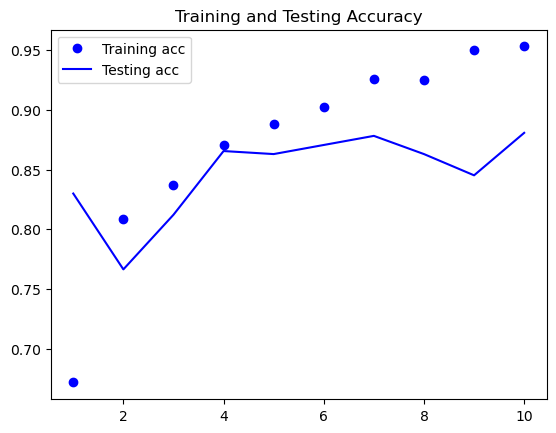

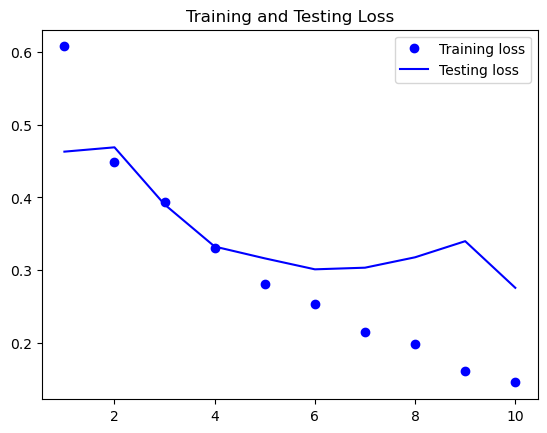

In [34]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Testing acc')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Testing loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.show()

In [35]:
acc_median = np.median(acc)
acc_median

0.8952321112155914

In [36]:
# Answer for Question №3: 0.90

In [37]:
loss_std = np.std(loss)
loss_std

0.13735892985660833

In [38]:
# Answer for Question №4: 0.11

# Data Augmentation

In [39]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [42]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 394 images belonging to 2 classes.


In [43]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 15s 193ms/step - loss: 0.4598 - acc: 0.7949 - val_loss: 0.6123 - val_acc: 0.7208
Epoch 2/10
80/80 [==============================] - 15s 193ms/step - loss: 0.4490 - acc: 0.7842 - val_loss: 0.3608 - val_acc: 0.8376
Epoch 3/10
80/80 [==============================] - 15s 193ms/step - loss: 0.4265 - acc: 0.8018 - val_loss: 0.2800 - val_acc: 0.8756
Epoch 4/10
80/80 [==============================] - 16s 194ms/step - loss: 0.3773 - acc: 0.8325 - val_loss: 0.4435 - val_acc: 0.7995
Epoch 5/10
80/80 [==============================] - 15s 192ms/step - loss: 0.3933 - acc: 0.8225 - val_loss: 0.4425 - val_acc: 0.7944
Epoch 6/10
80/80 [==============================] - 15s 193ms/step - loss: 0.3609 - acc: 0.8394 - val_loss: 0.4380 - val_acc: 0.8020
Epoch 7/10
80/80 [==============================] - 15s 193ms/step - loss: 0.3707 - acc: 0.8394 - val_loss: 0.2558 - val_acc: 0.8807
Epoch 8/10
80/80 [==============================] - 16s 194ms/step - 

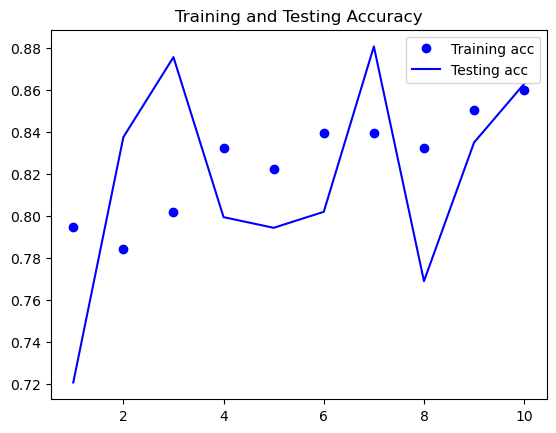

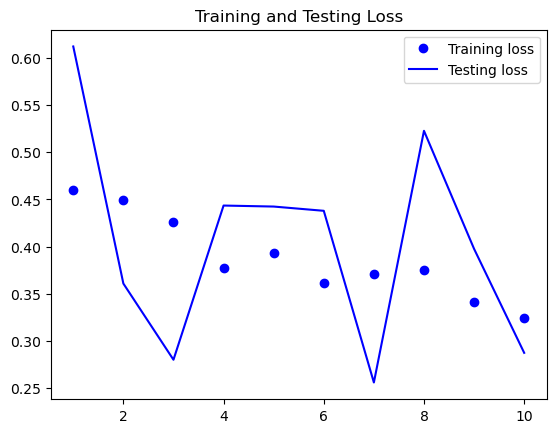

In [45]:
acc_aug = history.history['acc']
test_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
test_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, test_acc_aug, 'b', label='Testing acc')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, test_loss_aug, 'b', label='Testing loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.show()

In [46]:
loss_mean_aug = np.mean(test_loss_aug)
loss_mean_aug

0.4040603131055832

In [47]:
# Answer for question 5: 0.37

In [48]:
test_acc_aug[5:10]

[0.8020304441452026,
 0.8807106614112854,
 0.7690355181694031,
 0.8350253701210022,
 0.8629441857337952]

In [49]:
acc_mean_aug = np.mean(test_acc_aug[5:10])
acc_mean_aug

0.8299492359161377

In [50]:
# Answer for question 6: 0.84